In [6]:
#important imports
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import array
import seaborn as sns
import pandas as pd
import os
from os.path import join, dirname, abspath
from matplotlib.transforms import Affine2D


In [36]:
#settings window

#loading/saving parameters
picklepath="/mnt/Data1/Moseq_Processed/Data4/Analysis/scalar_df3_All.pickle" #location of the extracted pickled scalar data
load_filepath='/mnt/Data1/Moseq_Processed/Data4/Analysis/mouse_index_final_Tsc1.xlsx' #filepath for loading the excel 
#index file
save_graphs_to="/mnt/Data1/Moseq_Processed/Data4/Analysis/Graphs_T1" #where you will save your generated heatmaps
if not os.path.exists(save_graphs_to):
    os.makedirs(save_graphs_to)
    print("declared directory not found, creating directory")

createindex=False #create a new itemized index for the current parameters.
#generally not necessary as an index file has been created in the extraction. 
saving_filepath = 'mouse_index_uuid_ni.xlsx' #the name the initial excel will be saved to for intering sorting variables
#only matters if an index needs to be created
#if sharing a name with an already existing file, will prevent an index from being created to prevent loss of data


#heatmaps specific parameters
order=["Genotype","Housing","Sex"] #variables which we use to differentiate to sort the mice
#sorting will be done with the leftmost parameter taking priority
measurements=["dist_to_center_px","velocity_2d_mm","labels (usage sort)"] #the parameters we will turn into heatmaps
#for info on the parameters which can be chosen look at the end of the protocol or go to the github:
#https://github.com/dattalab/moseq2-app/wiki/MoSeq2-Analysis-Visualization-Notebook-Instructions
continuous=[1,1,0] #is the parameter continuous (like distance to center) or discrete (like syllable labels)
normalized=[1,0,0] #do we apply normalization to the parameters, 1 number required per paramater 1=yes,0=no
label=["normalized distance","velocity (mm/frame)","syllables (by usage)"] #the label of the x-axis of the heatmap
savename=["norm_distance","velocity","syllables"]
rounding=[3,1,0] #numbers to round with 3 means rounding to 3 digits below zero or 0.001 
maxrange=[1,50,40] #maximum of the range you want to analyse over, should be 1 for normalized graphs

maximum=[1,1,10] #the maximum value for the heatmap intensity


declared directory not found, creating directory


In [37]:
data_pickle=open(picklepath,"rb")
data_contents=pickle.load(data_pickle)
alluuids=data_contents["uuid"]
uuids,dataindex=np.unique(alluuids,return_index=True) #sort the mouse based on their original grouping (probably genotype)
groups=data_contents["group"][dataindex]
mouse=data_contents["SubjectName"][dataindex]
mouse=np.array(mouse)
mouse = mouse[np.argsort(groups)]
uuids=uuids[np.argsort(groups)]

if createindex==True: 
    Mousedict = {"uuid": uuids,'MouseNumber': mouse, 'Genotype': sorted(groups) } #create a dataframe to insert all of the groupings, original grouping is called Genotype from the start, but could be something else, in that case the name can be easily altered in the excel file
    mouseframe = pd.DataFrame(Mousedict)
    doubles=(set(order)&set(["MouseNumber","Genotype"])) 
    structure=order.copy()
    for i in doubles:
        structure.remove(i)
    mouseframe = mouseframe.reindex(columns = mouseframe.columns.tolist() + structure)
    print(mouseframe)
    if not(os.path.exists(saving_filepath)):
        mouseframe.to_excel(saving_filepath, index=False) #create in excel file to fill in the missing sorting data
    else:
        print("Warning:filepath already exists, be careful to not overwrite files!")

### at this point, an index will be generated which you will have to fill in in excel, fill this in before continuing!!


In [38]:
sorting = pd.read_excel (load_filepath,engine='openpyxl') #this is where the indexfile comes in, additional grouping is allowed because this
sorting=sorting.dropna() #remove columns which contains NaN (so missing certain labels)
stringlist=sorting[order[0]].to_numpy(copy=True) #creating a proper index for the variables and sorting them
 
for i in range(len(order)-1):
   stringlist+="-"+sorting[order[i+1]].to_numpy(copy=True)
sortingindex= np.argsort(stringlist)
uuidmouse=sorting["uuid"].to_numpy(copy=True)[sortingindex]
mouse=sorting["MouseNumber"].to_numpy(copy=True)[sortingindex]
stringlist=stringlist.astype(str)
splitlabels=np.chararray.split(stringlist,sep="-")
splitlabels=np.char.array([a for a in splitlabels[:]]).T
labellist=[]
amountlist=[]
#print(splitlabels.T)
ratio=[]
labelling=splitlabels[0]
mousetype,amount=np.unique(labelling,return_counts=True)
labellist.append(mousetype)
amountlist.append(amount)
ratio.append(2)
for i in range(len(splitlabels)-1):
    labelling=labelling+"-"+splitlabels[i+1]
    #print(labelling)
    mousetype,amount=np.unique(labelling,return_counts=True)
    labellist.append(mousetype)
    amountlist.append(amount)
    ratio.append(2)
ratio.append(50)
labelsmice,amount =np.unique(stringlist,return_counts=True)



In [39]:
#Options, examine if the index file is properly loaded
sorting = pd.read_excel (load_filepath,engine='openpyxl')
sorting=sorting.dropna()
print(sorting)

                                    uuid     MouseNumber  Genotype Housing Sex
0   d74e8526-5273-4f3d-9ca7-e29b0a6d0b9d   21MI16090-05F  TSC1 Mut      EE   f
1   d715a0e7-1eb0-4e77-bd79-9f3ad28c9a93  20-MI18801-02M  TSC1 Mut      EE   m
2   fa8b4623-40c1-49a3-92c0-143672968426  22-MI12417-08M  TSC1 Mut     std   m
3   d6db0a70-9e95-4f16-8831-07200837dcc9  21MI-17110-03M  TSC1 Mut     std   m
4   d9c2e69d-df50-441d-ba94-0104b48eb0d5  20-MI16076-02M  TSC1 Mut     std   m
..                                   ...             ...       ...     ...  ..
93  47e6864a-dc42-4cc9-8839-85bd12ed50b2       14566-08F   TSC1 Wt      EE   f
94  4466eb3b-0cb0-4ed2-a30d-a7b3fa2a9673  20-MI18803-01M   TSC1 Wt      EE   m
95  c7487ed0-02ff-450e-b5ce-d1fef7732797       19666-05F   TSC1 Wt     std   f
96  385000d7-fd09-4a69-895b-c4b3c5f1d0cb  21MI-17110-04F   TSC1 Wt      EE   f
97  00a84477-82ed-45c1-bc0c-6734446fc133  20-MI18801-08M   TSC1 Wt     std   m

[98 rows x 5 columns]


In [11]:
#data_to_excel
orderlist=order
columns= ["uuid",'MouseNumber']
columns=columns+orderlist
sheetdata=[uuidmouse,mouse]
#print(sheetdata)
for i in range(len(orderlist)):
    sheetdata= np.vstack((sheetdata,sorting[orderlist[i]].to_numpy(copy=True)[sortingindex]))
measuredata=data_contents[measurements]
measurementlist=[]
for i in range(len(uuidmouse)):
        mouseindex=data_contents["SubjectName"]==mouse[i]
        micedat=np.array(measuredata[mouseindex])
        measurementlist.append(micedat)

In [12]:
N=6 #how many parts we split up the data over time
lenlist=[np.shape(elem)[0] for elem in measurementlist]
for i in range(len(measurementlist)):
    nanshape=(max(lenlist)+(N-max(lenlist)%N)-np.shape(measurementlist[i])[0],np.shape(measurementlist[i])[1])
    measurementlist[i]=np.concatenate((measurementlist[i], np.zeros(nanshape)+np.nan))
measurementarray=np.dstack(measurementlist)

In [13]:
def overtimeplot(hella,amountlist,name,labellist,savepath):
    Ngroups=len(amountlist[-1])
    N=np.shape(hella)[0]
    indexstart=0
    timemeans=np.zeros((Ngroups,N))
    timestds=np.zeros((Ngroups,N))
    quartile1=np.zeros((Ngroups,N))
    quartile3=np.zeros((Ngroups,N))
    for i in range(Ngroups):
        indexend=indexstart+amountlist[-1][i]
        timemeans[i,:]=np.nanmean(hella[:,indexstart:indexend],1)
        timestds[i,:]=np.nanstd(hella[:,indexstart:indexend],1)
        quartile1[i,:]=abs(timemeans[i,:]-np.nanpercentile(hella[:,indexstart:indexend],25,1))
        quartile3[i,:]=abs(timemeans[i,:]-np.nanpercentile(hella[:,indexstart:indexend],75,1))
        indexstart=indexend
    xerror=np.linspace(0,N-1,N)
    fig, ax = plt.subplots()
    for i in range(Ngroups):
        trans=Affine2D().translate(+(i-(Ngroups-1)/2)*0.1, 0.0)+ax.transData
        plt.errorbar(xerror,timemeans[i,:].T,yerr=[quartile1[i,:], quartile3[i,:]],transform=trans,marker="o", linestyle="none")
    #plt.legend(labellist[-1])
    plt.legend(labellist[-1],bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.title(name+ " over time")
    filename=name+" over_time.svg"
    plt.savefig(join(savepath,filename), format = 'svg', dpi=600)
    return hella

In [14]:
hella2=np.array(np.split(measurementarray[:,2,:],N))
Ngroups=len(amountlist[-1])
syllim=50
sylrange=np.arange(0,syllim)
maxot=hella2.shape[1]
sylmatrices=[]
indexstart=0
for i in range(Ngroups):
    indexend=indexstart+amountlist[-1][i]
    sylmat=np.zeros((syllim,N))
    for j in range(N):
        hella3=hella2[j,:,indexstart:indexend]
        bins,counts=np.unique(hella3[~np.isnan(hella3)&~(hella3==-5)],return_counts=True)
        indexc=np.intersect1d(sylrange,bins,return_indices=True)
        sylmat[indexc[2],j]=counts[indexc[2]]/maxot
    sylmatrices.append(sylmat)
    indexstart=indexend
print(sylmatrices)

[array([[7.59620995e-01, 1.07302231e+00, 1.80149490e+00, 7.51896413e-02,
        1.33318514e-01, 2.80752452e-01],
       [4.14237684e-01, 5.20492373e-01, 1.14537775e+00, 3.31212315e-02,
        7.14662814e-02, 2.16788463e-01],
       [2.41657173e-01, 4.04734780e-01, 9.21559365e-01, 2.82308483e-02,
        1.10255912e-01, 3.82005613e-01],
       [3.30239795e-01, 4.18600128e-01, 9.24699214e-01, 2.69804663e-02,
        7.25777321e-02, 2.23179305e-01],
       [6.25857901e-01, 3.44327433e-01, 3.01230932e-01, 1.32484926e-01,
        4.59029148e-02, 2.73416877e-02],
       [3.53663619e-01, 4.02400734e-01, 6.56645086e-01, 8.75267443e-03,
        1.57270277e-02, 9.28061352e-03],
       [1.81333185e-01, 1.01086443e-01, 5.14045958e-02, 1.25593931e-02,
        6.33526911e-03, 5.00152824e-04],
       [1.47517297e-01, 2.27652894e-01, 2.39267554e-01, 4.41801662e-02,
        2.16288310e-01, 2.34516102e-01],
       [1.36291645e-01, 6.67148295e-02, 3.91786379e-02, 1.14479424e-02,
        5.11267332e-03,

declared directory not found, creating directory


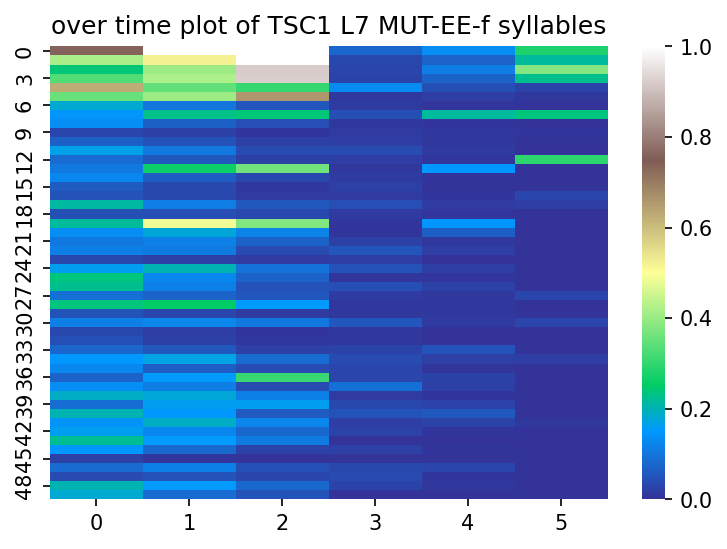

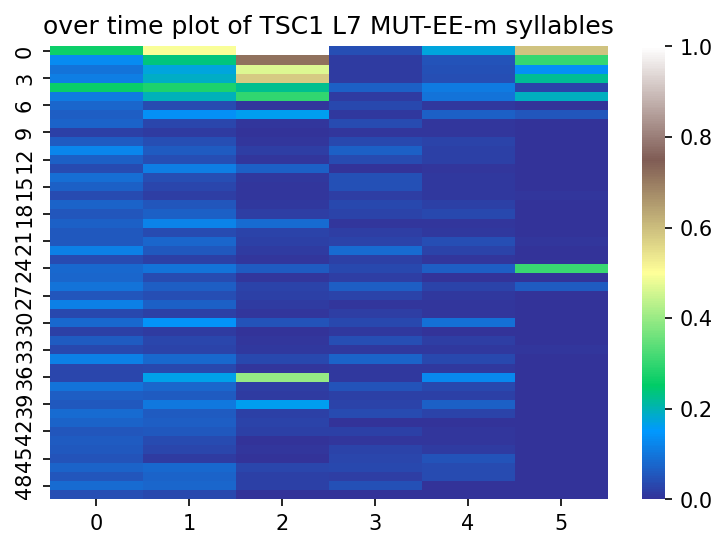

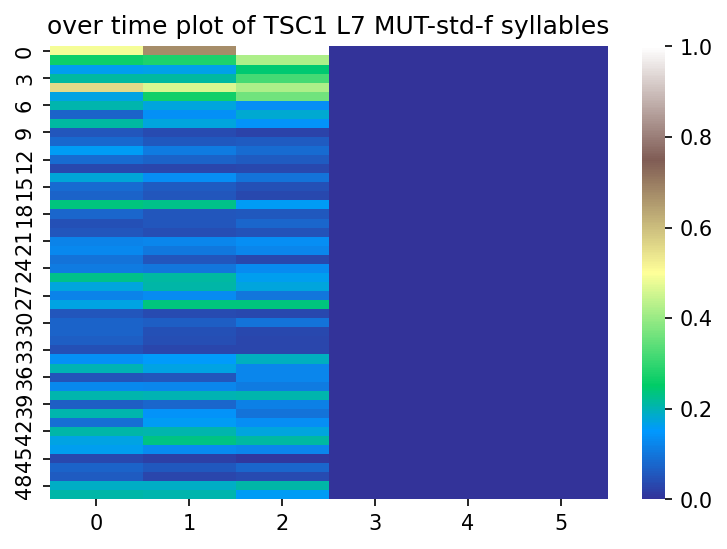

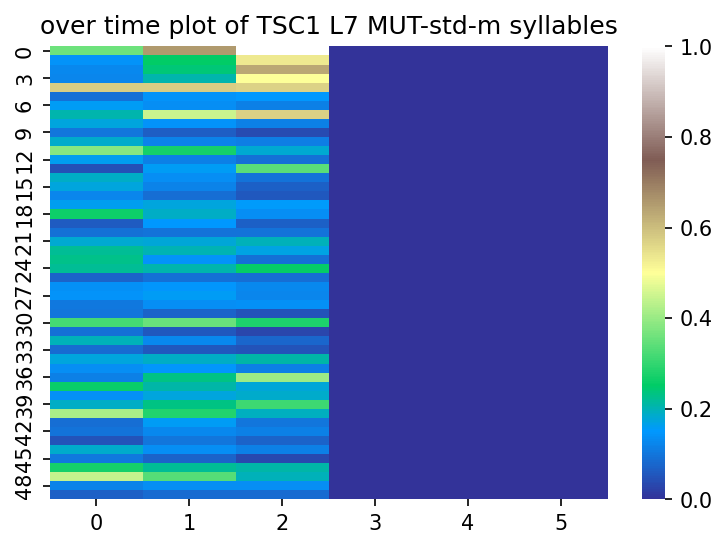

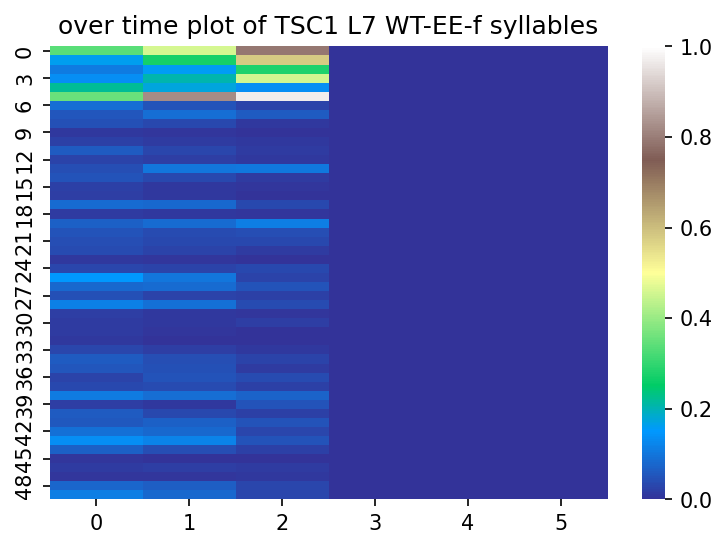

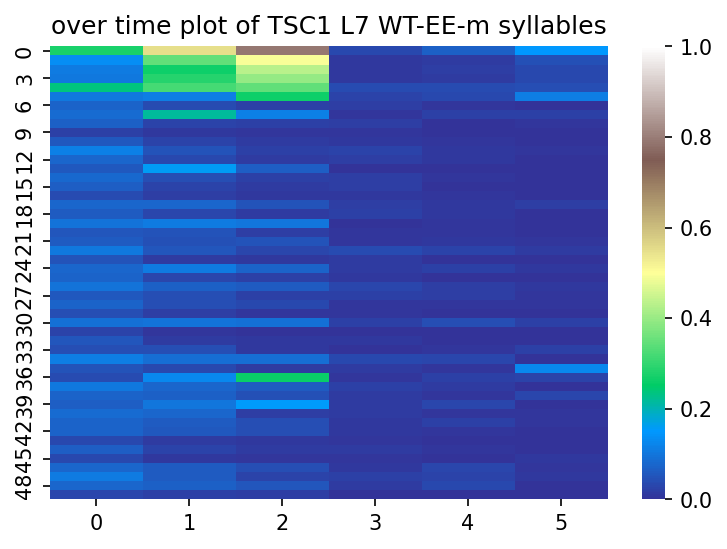

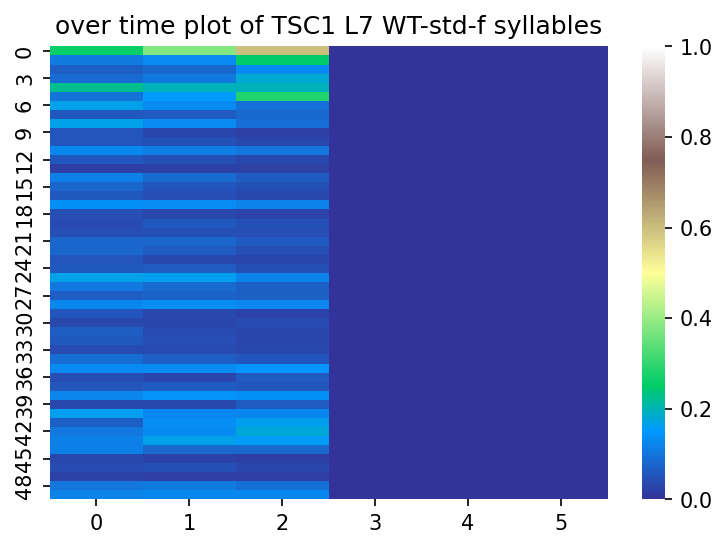

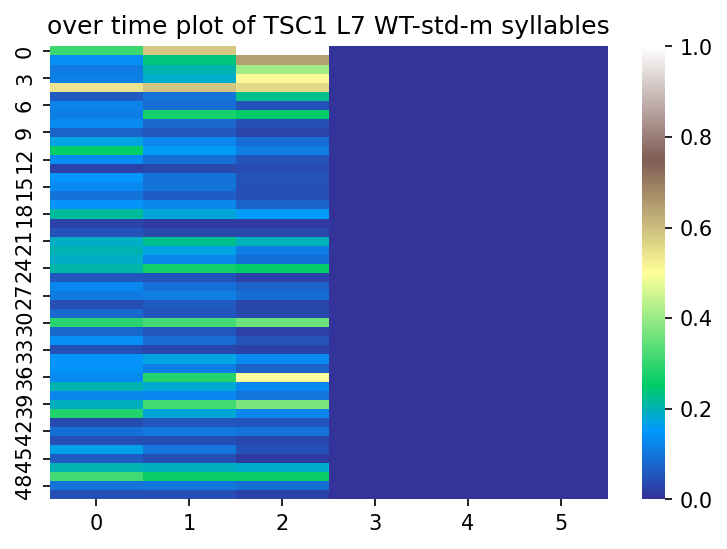

In [15]:
saveloc=save_graphs_to+"/over_time"
if not(os.path.exists(saveloc)):
    os.makedirs(saveloc)
    print("declared directory not found, creating directory")
for i in range(len(sylmatrices)):
    fig=plt.figure(dpi=150)
    sns.heatmap(sylmatrices[i],vmax=1, cmap="terrain")
    plt.title("over time plot of "+labellist[-1][i]+" syllables")
    filename=labellist[-1][i]+"_syl_overtime_"+"_heatmap.svg"
    plt.savefig(join(saveloc,filename), format = 'svg', dpi=300)

/tmp/ipykernel_3561851/3273327545.py:9: RuntimeWarning: Mean of empty slice
  hella=np.nanmean(np.split(measurementarray[:,j,:],N),1)
/tmp/ipykernel_3561851/267609410.py:11: RuntimeWarning: Mean of empty slice
  timemeans[i,:]=np.nanmean(hella[:,indexstart:indexend],1)
/mnt/Data1/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/Data1/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/tmp/ipykernel_3561851/3273327545.py:9: RuntimeWarning: Mean of empty slice
  hella=np.nanmean(np.split(measurementarray[:,j,:],N),1)
/tmp/ipykernel_3561851/267609410.py:11: RuntimeWarning: Mean of empty slice
  timemeans[i,:]=np.nanmean(hella[:,indexstart:indexend],1)
/mnt/Data1/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: Ru

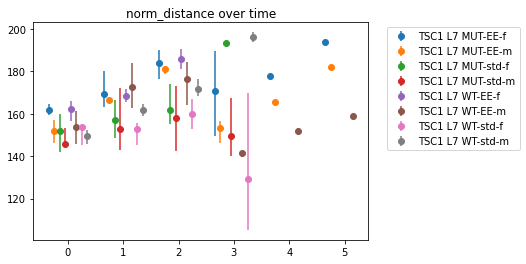

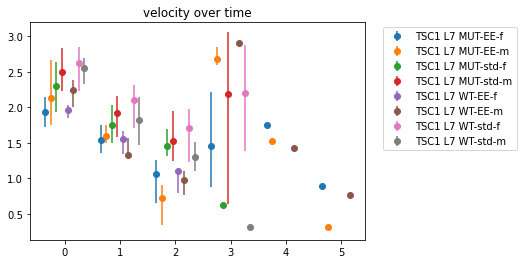

In [16]:
xceltimedata=sheetdata
columnsall=columns
saveloc=save_graphs_to+"/over_time"
if not(os.path.exists(saveloc)):
    os.makedirs(saveloc)
    print("declared directory not found, creating directory")
for j in range(len(measurements)):
    if continuous[j]==1:
        hella=np.nanmean(np.split(measurementarray[:,j,:],N),1)
        hella=overtimeplot(hella,amountlist,savename[j],labellist,saveloc)
    #else:
        
    xceltimedata=np.concatenate((xceltimedata,hella))
    strnum=(np.arange(np.shape(hella)[0])).astype(str)
    strnum=[savename[j]+":"+s for s in strnum]
    columnsall=np.concatenate((columnsall,strnum))

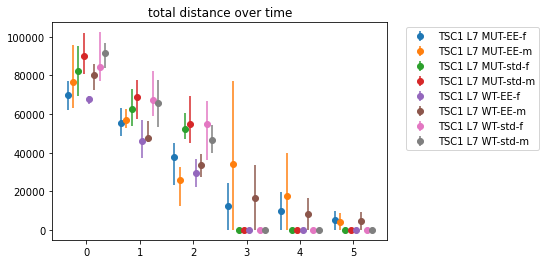

In [17]:
#optional: if speed is used, calculate the mean distance
i=measurements.index("velocity_2d_mm")
hella=np.nancumsum(np.split(measurementarray[:,i,:],N),1)
hella=hella.max(1)
hella=overtimeplot(hella,amountlist,"total distance",labellist,saveloc)
xceltimedata=np.concatenate((xceltimedata,hella))
strnum=(np.arange(np.shape(hella)[0])).astype(str)
strnum=["Total_Distance"+":"+s for s in strnum]
columnsall=np.concatenate((columnsall,strnum))

In [18]:
dfm=pd.DataFrame(xceltimedata.T,columns=columnsall)
dfm.to_excel("overtimedata.xlsx")  

In [19]:
#Heatmap generation, examine the datasets and condense the data into heatmaps of activity
N=len(mouse)
HeatmapData=[]
DataMean=[]
DataValue=[]
for j in range(len(measurements)):
    M=maxrange[j]*10**rounding[j]+1
    measuredata=data_contents[measurements[j]]
    measurematrix=np.zeros((N,M),dtype=np.int64)
    valuematrix=np.zeros((N,M))
    Meanlist=np.zeros((N,1))
    for i in range(len(mouse)):
        mouseindex=data_contents["SubjectName"]==mouse[i]# take a mouse from the dataframe in order of sorting
        micedat=measuredata[mouseindex&~np.isnan(measuredata)]
        micedat=micedat.to_numpy(dtype=np.float64)
        if normalized[j]==1:
            micenorm=micedat/max(micedat)
        else:
            micenorm=micedat
        dat=np.round(micenorm,rounding[j]) #take rounded distance
        unique, counts = np.unique(dat, return_counts=True) #find frequencies 
        index=(unique*(10**rounding[j])) #create numpy index
        index=index.astype(int)
        if any(index>=M): #bins based on the range of the index, if some of the values are outside of the range, delete them
            counts=counts[index<=(M-1)]
            index=index[index<=(M-1)]
        Meanlist[i]=np.mean(micenorm)
        measurematrix[i,index]=counts
        valuematrix[i,:]=np.arange(0,M)/10**rounding[j]
    DataMean.append([Meanlist])
    DataValue.append([])
    HeatmapData.append([measurematrix])


In [20]:
#get number of transitions per mouse
j=measurements.index("labels (usage sort)")
nanarray=np.full(np.shape(measurementarray[1:,j,:]),np.nan)
transition=(measurementarray[1:,j,:]!=(measurementarray[:-1,j,:])  )
notNaN=~np.isnan(measurementarray[1:,j,:])
outcome=transition&notNaN
transitions=np.sum(outcome,0)

In [21]:
#temporary code, put all data in an excel for machine learning training

learnex=[mouse,stringlist[sortingindex]]
learncol=["Mouse Number","Genotype"]
learnex=np.vstack((learnex,transitions))
learncol=np.concatenate((learncol,["Number Of Transitions"]))
for i in range(len(measurements)):
    if continuous[i]==1:
        testing=np.array(DataMean[i])
        if normalized[j]==0:
            testing=testing/np.mean(testing)
        testing=testing[:,:,0]
        learnex=np.vstack((learnex,testing))
        learncol=np.concatenate((learncol,[savename[i]+" Mean"]))
       
            
    else:
        traindat=HeatmapData[i][0].T
        traindat=(traindat/np.mean(traindat))
        learnex=np.vstack((learnex,traindat)) 
        strnum=(np.arange(np.shape(traindat)[0])).astype(str)
        strnum=[savename[i]+":"+s for s in strnum]
        learncol=np.concatenate((learncol,strnum))

dfm=pd.DataFrame(learnex.T,columns=learncol)
dfm.to_excel("trainingdata.xlsx")  

declared directory not found, creating directory
['TSC1 L7 MUT-EE-f' 'TSC1 L7 MUT-EE-m' 'TSC1 L7 MUT-std-f'
 'TSC1 L7 MUT-std-m' 'TSC1 L7 WT-EE-f' 'TSC1 L7 WT-EE-m'
 'TSC1 L7 WT-std-f' 'TSC1 L7 WT-std-m']


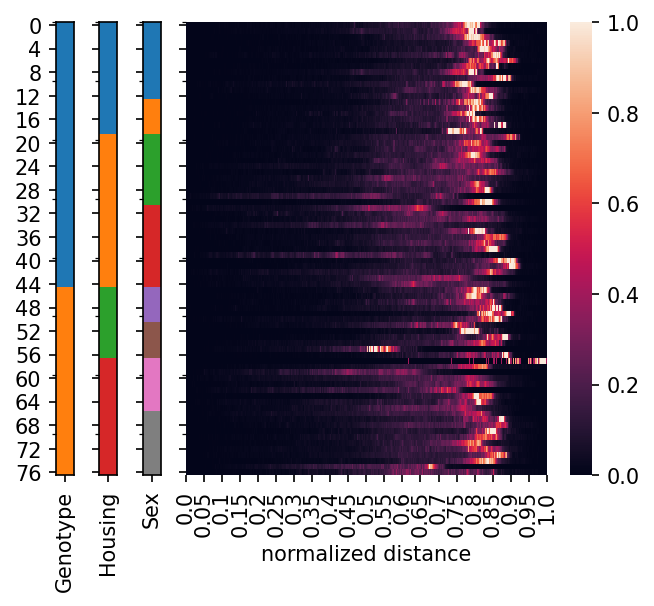

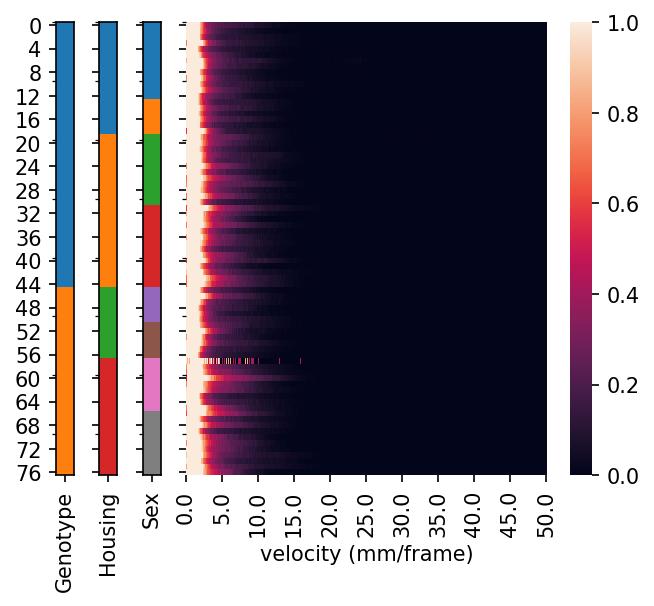

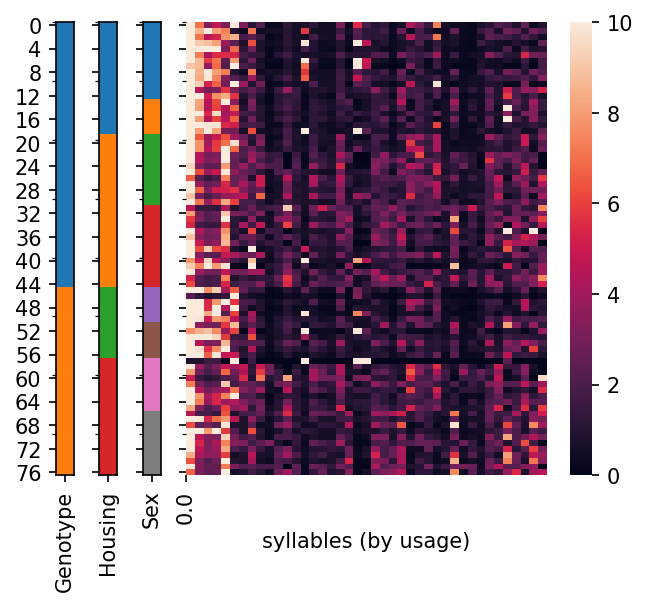

In [22]:
#plot the data generated and safe the figures in the designated folder
saveloc=save_graphs_to+"/Heatmaps"
if not(os.path.exists(saveloc)):
    os.makedirs(saveloc)
    print("declared directory not found, creating directory")
sub=len(labellist)+1
for j in range(len(measurements)):
    f,ax = plt.subplots(1,sub,sharey=True,gridspec_kw={'width_ratios': ratio},dpi=150,figsize=(5,round(len(mouse)/20)))
    
    maxindex=maxrange[j]*10**rounding[j]+1
    for i in range(len(labellist)):
        labelframe=pd.DataFrame(np.reshape(amountlist[i],(1,len(amountlist[i]))),index=[order[i]],columns=labellist[i])
        plt.subplots_adjust(wspace=0.2, hspace=0)
        labelframe.plot(ax=ax[i],kind='bar', stacked=True,legend=False,width=100)
    
    test=HeatmapData[j][0]
    test2=np.sum(test,1)
    ax[-1]=sns.heatmap((test.T*100/test2).T, vmax=maximum[j])
    ax[-1].set(xlabel=label[j], ylabel='mice sorted')
    #s=sns.heatmap((test.T*100/test2).T[:,:maxindex], vmax=1)
    #s.set(xlabel=label[j], ylabel='mice sorted')
    plt.xticks(np.array(range(0,maxindex,50)), np.array(range(0,maxindex,50))/(10**rounding[j]))
    filename=str(savename[j])+"_heatmap.svg"
    plt.savefig(join(save_graphs_to,filename), format = 'svg', dpi=300)
print(labelsmice)


In [23]:
bigtest=(test.T*100/test2).T

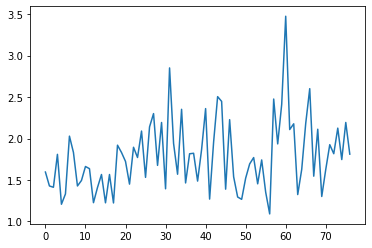

In [24]:
testing=np.array(DataMean[1])
plt.plot(testing[0,:,0])
#print(np.shape(measurementarray[:,1,:]))
#plt.plot(np.nanmean(measurementarray[:,1,:],0))


In [40]:
print(labellist[2])
#print(amountlist)

['TSC1 Mut-EE-f' 'TSC1 Mut-EE-m' 'TSC1 Mut-std-f' 'TSC1 Mut-std-m'
 'TSC1 Wt-EE-f' 'TSC1 Wt-EE-m' 'TSC1 Wt-std-f' 'TSC1 Wt-std-m']


In [26]:
#all
#g1=['s2_Mut','s2_Mut','s2_Mut','s2_Mut','s2_Wt','s2_Wt','s2_Wt','s2_Wt',"L7_Wt","L7_Wt","L7_Wt","L7_Wt","L7_Mut","L7_Mut","L7_Mut","L7_Mut","t1_Mut","t1_Mut","t1_Mut","t1_Mut","t1_Wt","t1_Wt","t1_Wt","t1_Wt"]
#g2=['EE','EE','std','std','EE','EE','std','std','EE','EE','std','std','EE','EE','std','std','EE','EE','std','std','EE','EE','std','std']
#g3=['F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M','F','M']
#LL7TSC1
#g1=["L7_Mut","L7_Mut","L7_Mut","L7_Mut","L7_Wt","L7_Wt","L7_Wt","L7_Wt"]
#g2=['EE','EE','std','std','EE','EE','std','std']
#g3=['F','M','F','M','F','M','F','M']
#Shank2 
#g1=['s2_Mut','s2_Mut','s2_Mut','s2_Mut','s2_Wt','s2_Wt','s2_Wt','s2_Wt']
#g2=['EE','EE','std','std','EE','EE','std','std']
#g3=['F','M','F','M','F','M','F','M']
#TSC1 no L7
g1=["t1_Mut","t1_Mut","t1_Mut","t1_Mut","t1_Wt","t1_Wt","t1_Wt","t1_Wt"]
g2=['EE','EE','std','std','EE','EE','std','std']
g3=['F','M','F','M','F','M','F','M']

In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [149]:
g1array=[]
g2array=[]
g3array=[]
for i in range(len(labellist[2])):
    g1array=np.append(g1array,np.repeat([g1[i]],amountlist[2][i]))
    g2array=np.append(g2array,np.repeat([g2[i]],amountlist[2][i]))
    g3array=np.append(g3array,np.repeat([g3[i]],amountlist[2][i]))


IndexError: list index out of range

In [ ]:
Sign=np.zeros((7,41))
for i in range(len((bigtest[0,:]))):
    dfb = pd.DataFrame({'Genotype': g1array,
                   'Sex': g3array,
                   'housing': g2array,
                   'label': bigtest[:,i]})
    dfb
    model = ols("""label ~ C(Genotype) + C(Sex) + C(housing) +
               C(Genotype):C(Sex) + C(Genotype):C(housing) + C(Sex):C(housing) +
               C(Genotype):C(Sex):C(housing)""", data=dfb).fit()
    Sign[:,i]=sm.stats.anova_lm(model, typ=2)['PR(>F)'][:-1]
print(Sign)

In [124]:
model = ols("""label ~ C(Genotype) + C(Sex) + C(housing) +
               C(Genotype):C(Sex) + C(Genotype):C(housing) + C(Sex):C(housing) +
               C(Genotype):C(Sex):C(housing)""", data=dfb).fit()

In [125]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Genotype),0.332513,1.0,0.126692,0.722720
C(Sex),0.130918,1.0,0.049882,0.823776
C(housing),0.725518,1.0,0.276432,0.600343
C(Genotype):C(Sex),0.024080,1.0,0.009175,0.923905
C(Genotype):C(housing),3.018349,1.0,1.150030,0.286410
C(Sex):C(housing),11.423171,1.0,4.352378,0.039787
C(Genotype):C(Sex):C(housing),0.125961,1.0,0.047993,0.827090
Residual,236.212350,90.0,NaN,NaN


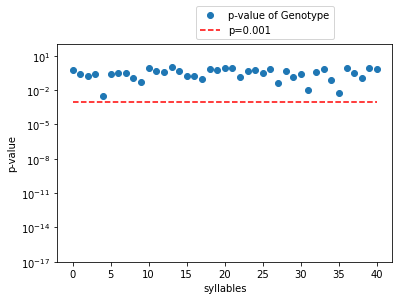

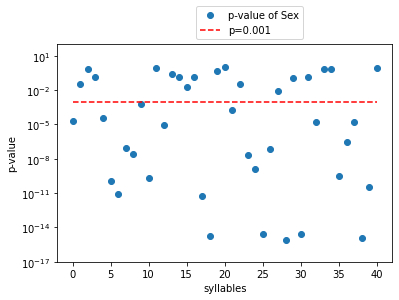

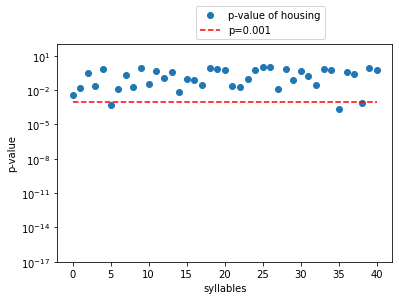

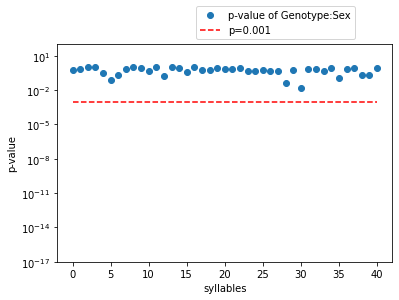

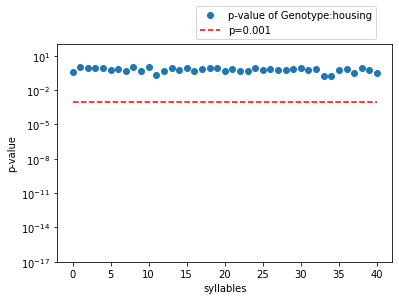

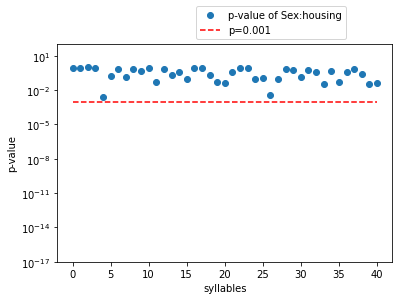

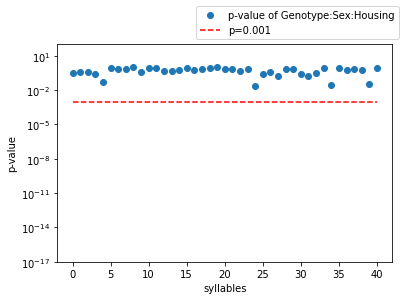

In [126]:
labels=['Genotype','Sex','housing','Genotype:Sex','Genotype:housing','Sex:housing','Genotype:Sex:Housing']
line=np.repeat([0.001],41)
for i in range(7):
    
    plt.figure()
    #plt.title("signficance for "+labels[i]+" of all syllables")
    plt.plot(Sign[i,:],linestyle="",marker="o")
    plt.plot(line,linestyle='--',color='r')
    plt.yscale("log")
    plt.ylim([10**-17, 100])   
    plt.ylabel('p-value')
    plt.xlabel('syllables')
    plt.legend(['p-value of '+labels[i],'p=0.001'],bbox_to_anchor=(0.4,1))
    filename=labels[i]+"_p-value.svg"
    plt.savefig(join(save_graphs_to,filename), format = 'svg', dpi=300)

Everything below this point is probably bullshit, havent had the time to shift through it yet

In [ ]:
sum((Sign<0.001).T)
Sign<0.001


In [ ]:
print(np.where((Sign<0.001)[3])[0])

In [ ]:
print(dfb)

In [ ]:
indexstart=0
meanlist=[]

for i in range(len(amountlist[2])):
    
    usagemean=np.mean(bigtest[indexstart:indexstart+amountlist[2][i],:],0)
    groupedusages=bigtest[indexstart:indexstart+amountlist[2][i],:]
    meanlist.append(usagemean)
    indexstart=indexstart-1+amountlist[2][i]
meanlist=np.array(meanlist)

In [ ]:
print(mouse)
print(stringlist[sortingindex])

In [ ]:
print(np.mean(bigtest[indexstart:indexstart+amountlist[2][i],:]))

In [ ]:
print(np.mean(bigtest[:,indexstart:indexstart+amountlist[2][i]],1))

In [ ]:
sns.heatmap(meanlist)

9
21
30
43
51
58
68
80


/tmp/ipykernel_3568498/439911606.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  groupedusages=np.array(groupedusages)


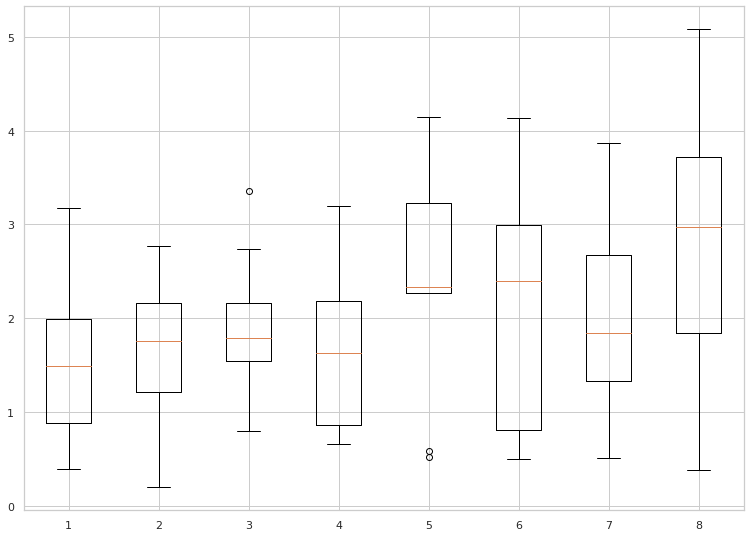

In [282]:
syllable=23
meanlist=[]
indexstart=0
groupedusages=[]
for i in range(len(amountlist[2])):

    usagemean=np.mean(bigtest[indexstart:indexstart+amountlist[2][i],syllable],0)
    groupedusages.append(bigtest[indexstart:indexstart+amountlist[2][i],syllable])
    meanlist.append(usagemean)
    indexstart=indexstart+amountlist[2][i]-1
groupedusages=np.array(groupedusages)
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(groupedusages)

# show plot
plt.show()

In [253]:
print(bigtest[indexstart:indexstart+amountlist[2][i],syllable])

[ 3.53709949  3.97808185  2.30945077  1.40125685  4.52372823  4.3150993
  4.0026012  25.58151543  2.76099159  1.46859576  1.9821499   3.78151261
  5.43815381]


/mnt/Data1/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (13,) (10,) 

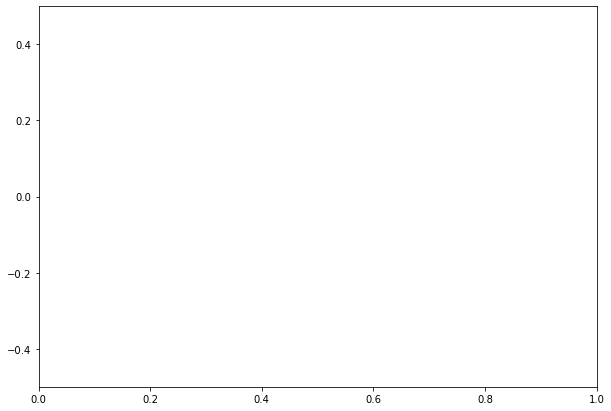

In [268]:
groupedusages=np.array(groupedusages)
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = sns.swarmplot(groupedusages)
 
# Creating plot


In [272]:

sns.set(style="whitegrid")


ax = sns.boxplot(x="day", y="total_bill", data=groupedusages, showfliers = False)
ax = sns.swarmplot(x="day", y="total_bill", data=groupedusages, color=".25")

AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [275]:
groupedusages

array([array([1.70109612, 0.66868925, 0.82647858, 1.79703169, 1.28030044,
              2.32205837, 0.39343196, 3.17800439, 1.03940053, 2.05167909]),
       array([2.05167909, 2.22947059, 0.55643879, 1.21431951, 0.65172339,
              2.77290707, 0.19645517, 1.75330667, 1.66025232, 2.36747551,
              2.16547374, 1.75518061, 1.83264177])                       ,
       array([1.83264177, 3.35603742, 2.11119662, 2.17881909, 1.13676653,
              1.75609282, 2.74176451, 1.5393463 , 1.5688794 , 0.79779145]),
       array([0.79779145, 1.77940704, 1.64779196, 2.81351539, 1.04686292,
              0.75562425, 1.6049242 , 1.90333443, 1.50367362, 2.4882986 ,
              3.19311112, 0.65747186, 0.76323667, 2.28336522])           ,
       array([2.28336522, 0.58776987, 0.51850896, 4.14146967, 2.27090426,
              2.66537369, 3.22555788, 4.09164685, 2.33422749])           ,
       array([2.33422749, 2.78446896, 3.62121399, 2.45002526, 4.13669065,
              0.84333293, 0.502

In [277]:
datagroups = pd.DataFrame(groupedusages, columns = labellist[2][:])

ValueError: Shape of passed values is (8, 1), indices imply (8, 8)

In [276]:
print(labellist[2

['Shank2 Mut-EE-F' 'Shank2 Mut-EE-M' 'Shank2 Mut-std-F' 'Shank2 Mut-std-M'
 'Shank2 Wt-EE-F' 'Shank2 Wt-EE-M' 'Shank2 Wt-std-F' 'Shank2 Wt-std-M']


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
